# TASK 3 - The Sparks Foundation (Data Science and Bussiness Analytics Intern)
### GRIP FEB 2021

# Exploratory Data Analysis - Retail
### (Level - Beginner)

## Author : Smriti Pradhan

### 1.1 . Importing Libraries

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1.2.Reading the DATA

In [234]:
data = pd.read_csv("SampleSuperstore.csv")

In [235]:
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [236]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [237]:
print("The Number of Rows and Columns in the DataSet are",data.shape)

The Number of Rows and Columns in the DataSet are (9994, 13)


### 1.3 Finding the Missing Value

In [238]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### 1.4 Statistical Details of the Dataset

In [239]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### 1.5.Drop the Duplicate Rows

In [240]:
data.duplicated().sum()

17

In [241]:
data = data.drop_duplicates()

In [242]:
print("Now the shape of the Dataset is:",data.shape)

Now the shape of the Dataset is: (9977, 13)


### 1.6.Finding the unique values in a axis

In [243]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

 #### Observation : Country is Unique. We can also drop the Country.

In [244]:
data["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [245]:
data["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

In [246]:
data["Region"].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [247]:
data["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

### 1.7 .Dropping Country and Postal Code Column

In [248]:
col=['Postal Code'] #Postal Code will not help as an Numerical Attribute
data = data.drop(columns=col,axis=1)


In [249]:
col=['Country']
data = data.drop(columns=col,axis=1)

### 1.8 Correlation between Numerical Attributes

In [250]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


In [251]:
data.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


__Its value tells us how much our two variables fluctuate together. _<br>
The higher the absolute value, the stronger the relationship.___

### 1.9 Printing the top 5 Rows

In [252]:
data.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# 1.10. EDA  -- DATA VISUALISATION

### 1.10.1 . Univariate Analysis

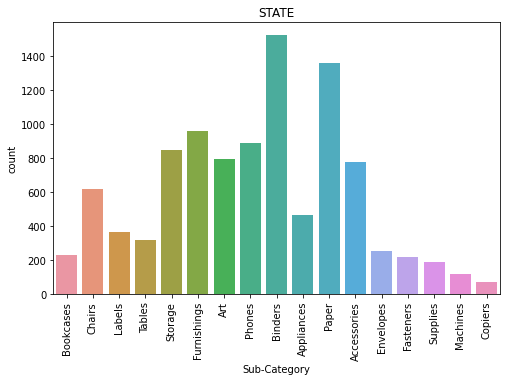

In [253]:
#Countplot (can be thought of as an Histogram across a Categorical Variable)
plt.figure(figsize=(8,5))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

__Observations : <br>-- Counts across the nested variable is high in the case Binders and Paper.__<br>              --                    ___Counts across the nested variable is low in the case Machines and Copiers.___

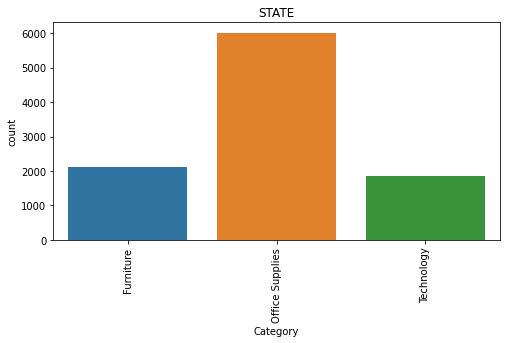

In [254]:
plt.figure(figsize=(8,4))
sns.countplot(x=data['Category'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

__Observations : <br>-- Counts across variables are  high in the case of Office Suppliers.__


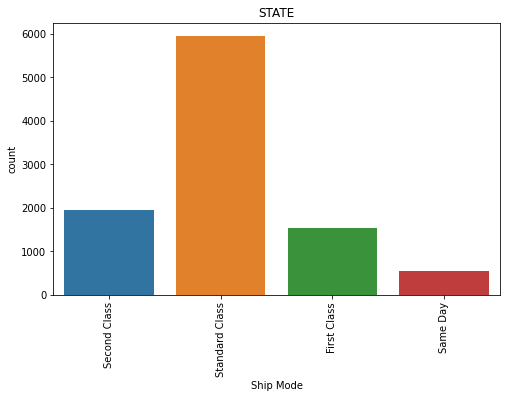

In [255]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Ship Mode'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

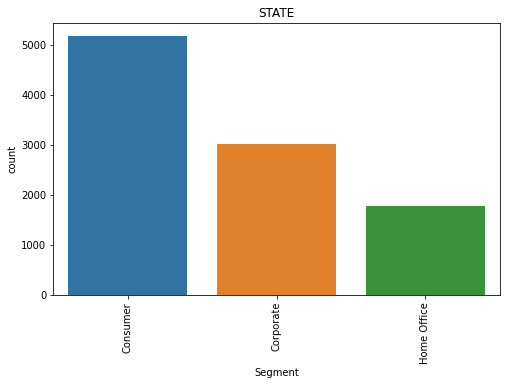

In [256]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Segment'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

# 1.10.2 Bivariate Analysis

## a)Profit Vs Sub-Category

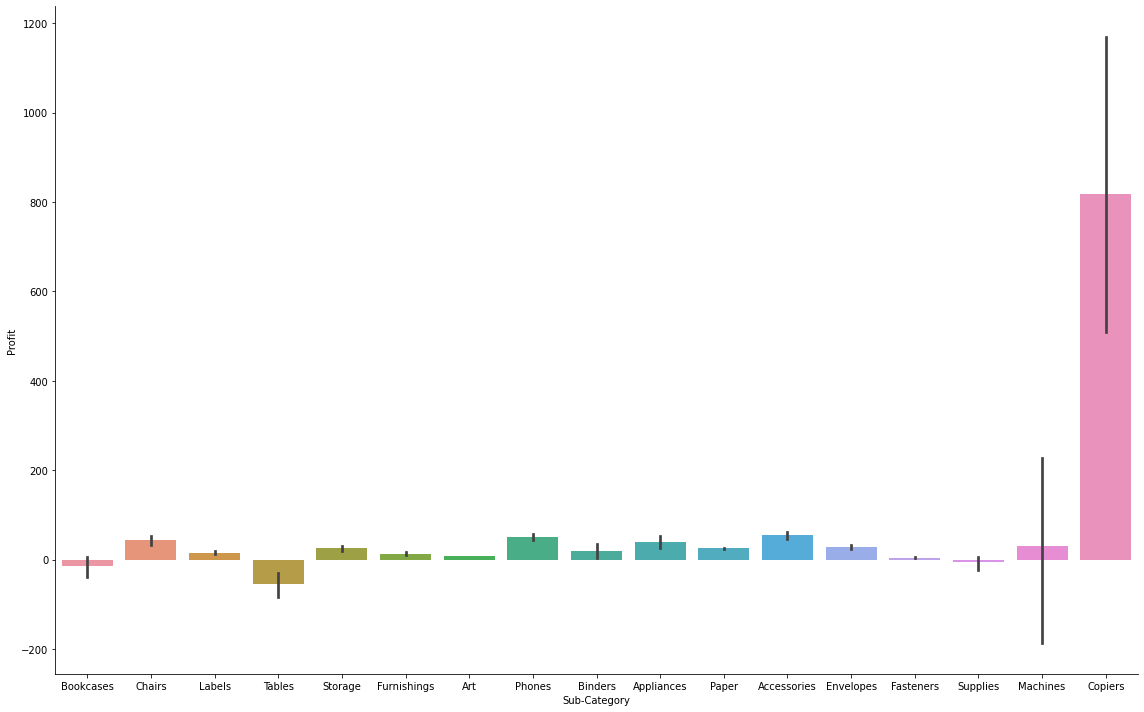

In [257]:
sns.catplot(x="Sub-Category", y="Profit", kind="bar",height=10, aspect=1.6,data=data)

__Insights:___

__After observing the Plot between Profit and Sub-Category we find that :<br>
</t>         1.Copiers is making the Maximum Profit.<br>
</t>         2.Art,Fasterners,Suppliers,BookCases,Tables,Labels,Furnishing are making the least Profit or No Profit or loss<br>
</t>         3.We found out the weak areas where we can try to make more Profits.<br>
</t>         4.Vey few Machines also makes less profit.__

## b)Discount Vs Sub-Category

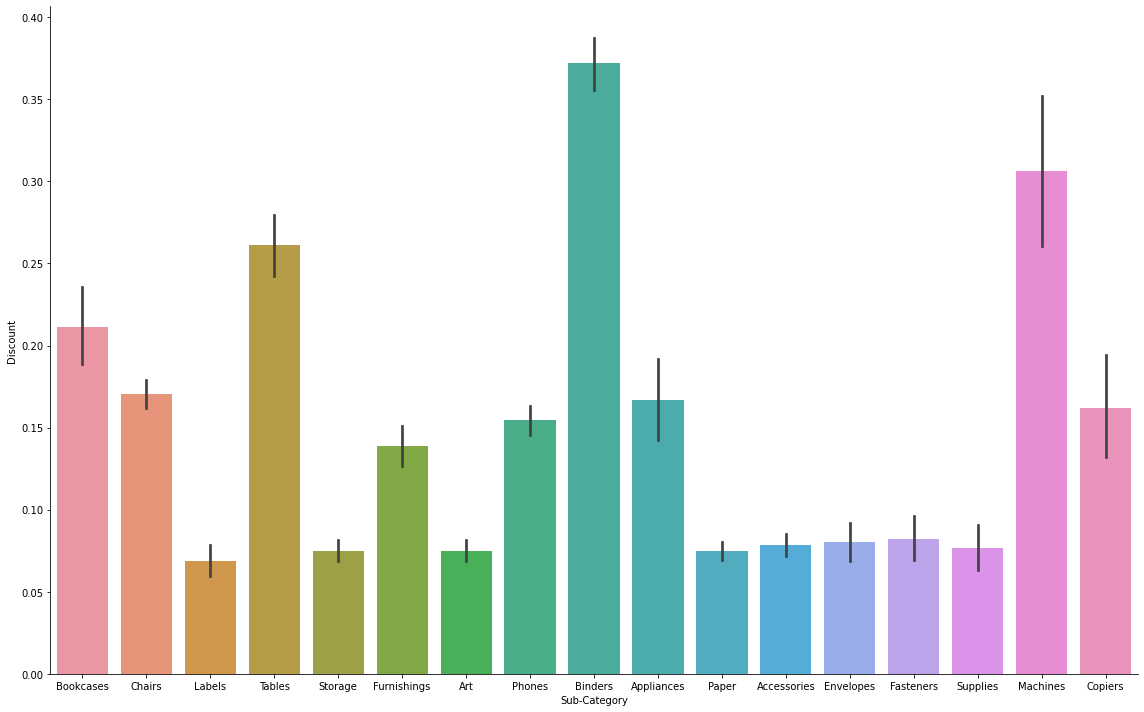

In [258]:
sns.catplot(x="Sub-Category", y="Discount", kind="bar", height=10, aspect=1.6,data=data)

__Insights:<br>
    1.BookCases Have Medium Discount which may be the reason of No Profit.<br>
    2.Machine Have High Discount which may be the reason of Less Profit.<br>
    3.Table have High Discount which may be the reason of Loss.<br>
    4.There is Decent Discount in Furnishing which may be the reason of Less or no Profit .<br>__

## c)Sales vs Sub-Category

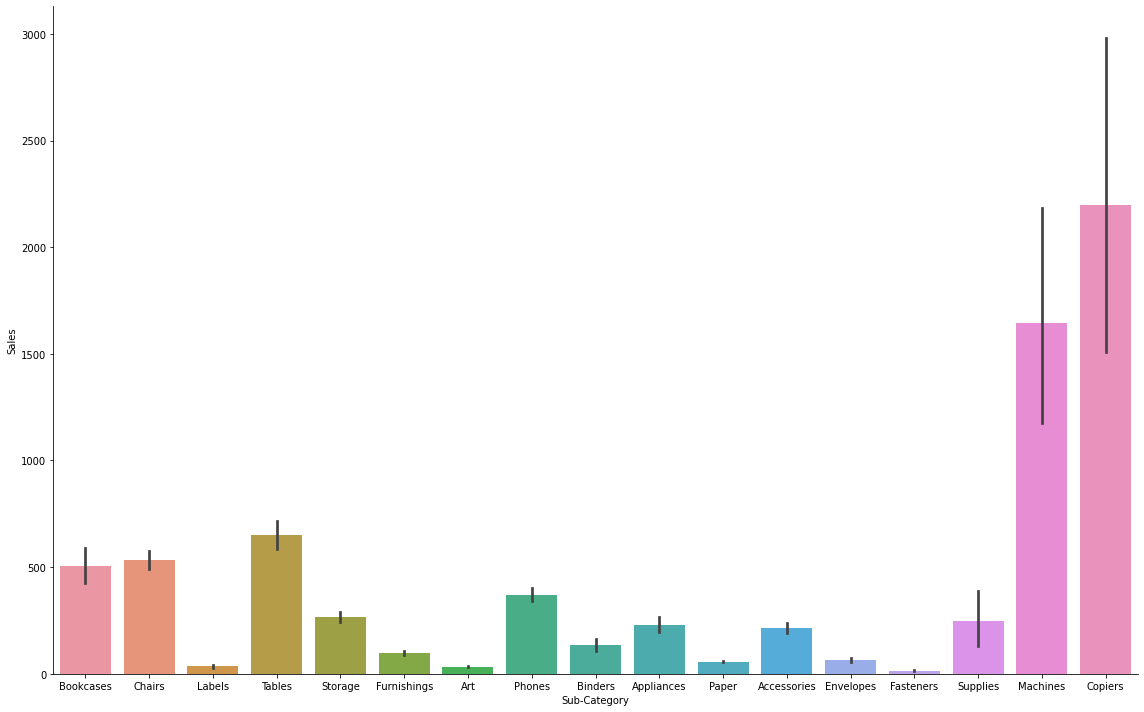

In [259]:
sns.catplot(x="Sub-Category", y="Sales", kind="bar", height=10, aspect=1.6,data=data)


__Insights:<br>
    1.Sales in Labels are Less which may be the reason of Less Profit.<br>
    2.Sales in Art are less which may be reason of Less Profit.<br>
    3.Sales in Fasteners are low which may be the reason of Less Profit.    
    4.Sales in Furnishing is low which may be the reason of Less Profit.<br>
    ___

## d)Profit Vs Ship-Mode

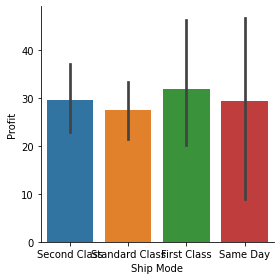

In [260]:
sns.catplot(x="Ship Mode", y="Profit", kind="bar", height=4, aspect=1,data=data)

__Insights:<br>__
__1.Every Ship-Mode makes decent Profit.<br>__
__2.No Ship-Mode makes exceptionally more or Less Profit.__

## e)Profit Vs Category

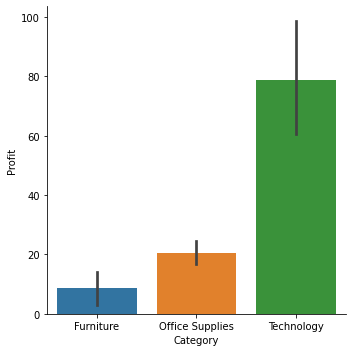

In [261]:
sns.catplot(x="Category", y="Profit", kind="bar", height=5, aspect=1,data=data)

__Insights<br>
1.Category Furniture makes very Less Profit.<br>
2.Category Technology makes a very good Profit.___

## f)Sales Vs Category

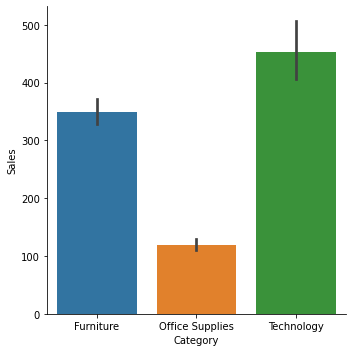

In [262]:
sns.catplot(x="Category", y="Sales", kind="bar", height=5, aspect=1,data=data)

__Insights: Sales in Category Furniture may not be the reason of Less Profit.__

## g)Discount Vs Category

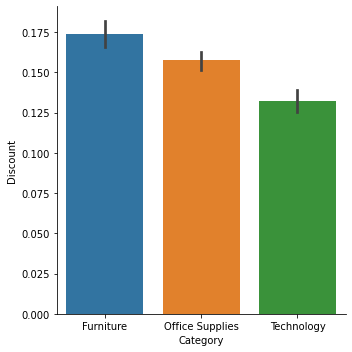

In [263]:
sns.catplot(x="Category", y="Discount", kind="bar", height=5, aspect=1,data=data)

___Insights : Disocunt is High in Furniture which mat be reason of Low Profit.___

## h)Profit Vs Segment

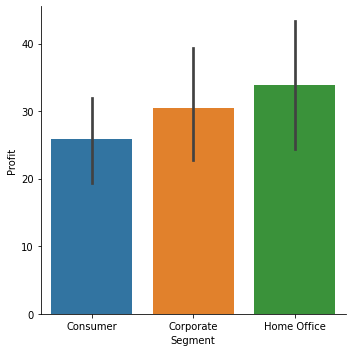

In [264]:
sns.catplot(x="Segment", y="Profit", kind="bar", height=5, aspect=1,data=data)

__Insights<br>
1.Every Segment helps in making decent Profit.<br>___


## i)Profit vs Discount

In [265]:
data_disc=data.groupby(['Discount'])['Sales','Profit'].mean()
data_disc.head(10)


/home/smriti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Sales,Profit
Discount,,
0.00,227.131306,67.024108
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.281397,24.721217
0.30,455.510102,-45.828401
0.32,536.794770,-88.560656
0.40,565.134874,-111.927429
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456


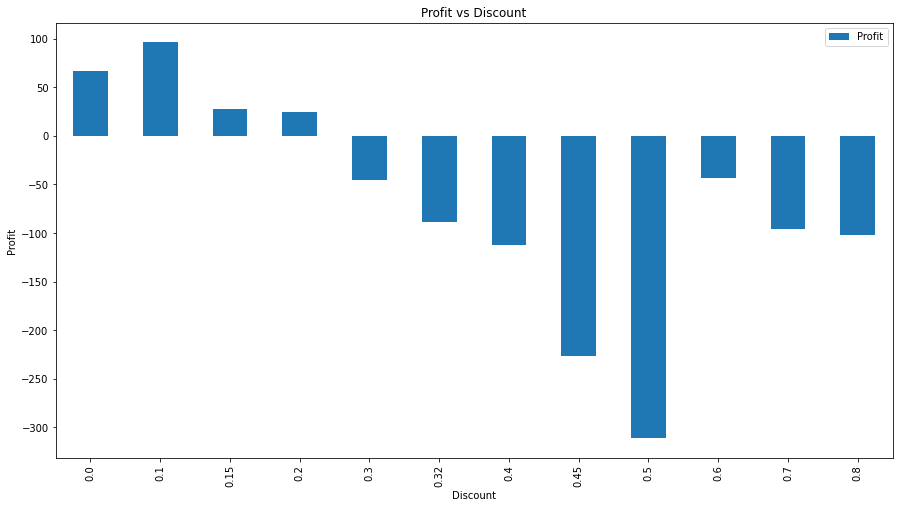

In [266]:
data_disc['Profit'].plot(kind='bar',figsize=(15,8))
plt.ylabel('Profit')
plt.title('Profit vs Discount')
plt.legend()

__Insights: Profit Decreases when Discount Increases.Max Profit at Discount 0.1__

## STATE Vs Profit 

<Figure size 1080x1080 with 0 Axes>

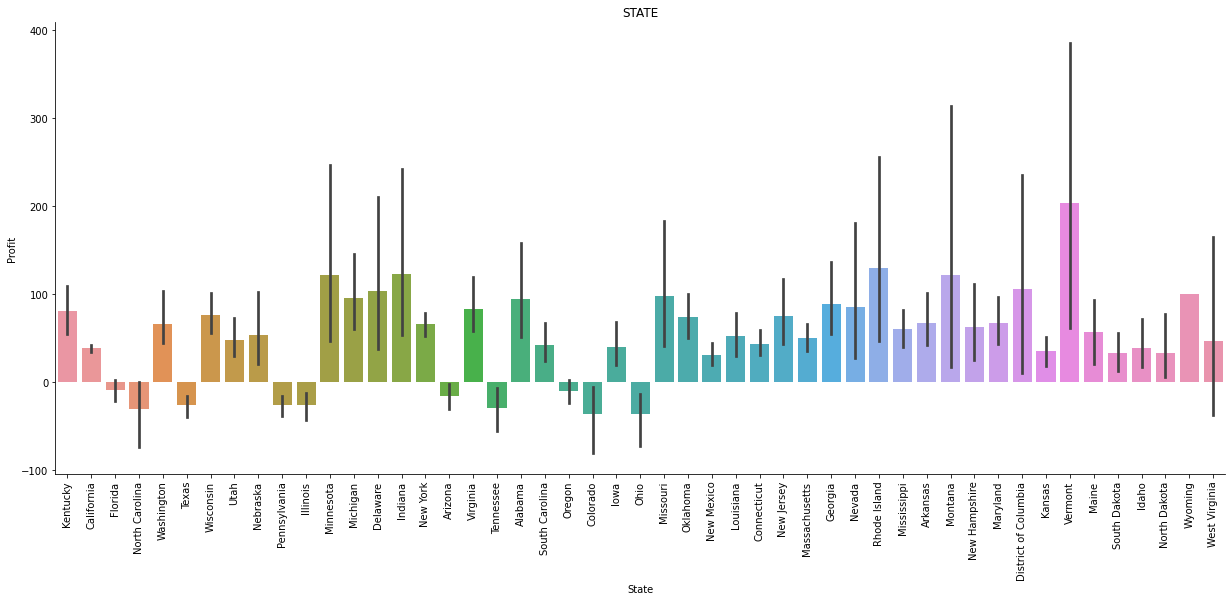

In [267]:
plt.figure(figsize=(15,15))
sns.catplot(x="State", y="Profit", kind="bar", height=7, aspect=2.5,data=data)
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

## STATE Vs Sales

<Figure size 1080x1080 with 0 Axes>

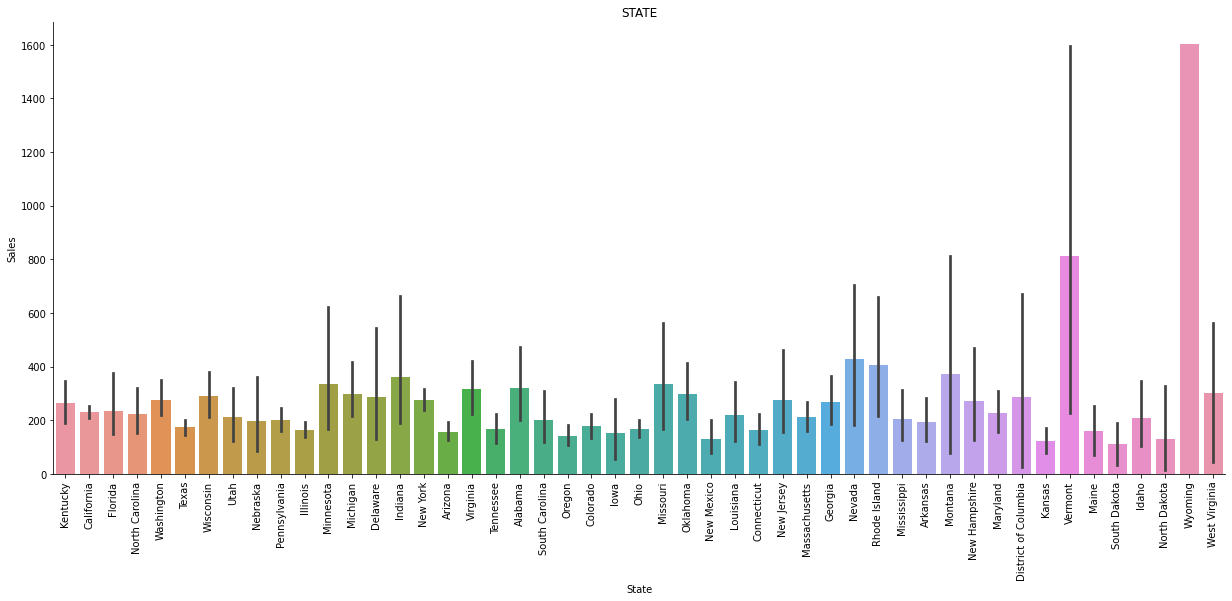

In [268]:
plt.figure(figsize=(15,15))
sns.catplot(x="State", y="Sales", kind="bar", height=7, aspect=2.5,data=data)
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

## STATE Vs Discounts

<Figure size 1080x1080 with 0 Axes>

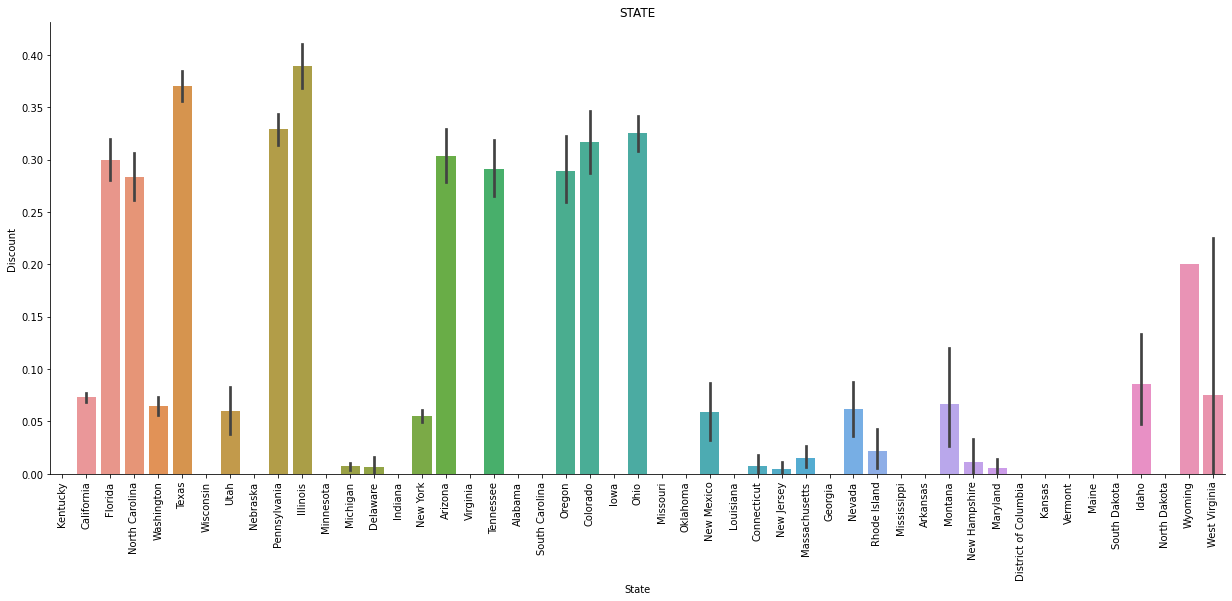

In [269]:
plt.figure(figsize=(15,15))
sns.catplot(x="State", y="Discount", kind="bar", height=7, aspect=2.5,data=data)
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

#                                   ____THANK YOU ____